In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering
%matplotlib inline
import json

# PEARSON

In [3]:
with open("Pearson_ica.json") as json_file:
    data = json.load(json_file)['data']

# SPEARMAN

In [2]:
with open("Spearman_ica.json") as json_file:
    data = json.load(json_file)['data']

# COSINE SIMILARITY

In [6]:
with open("Cosine_ica.json") as json_file:
    data = json.load(json_file)['data']

# SSIM

In [9]:
with open("SSIM_ica.json") as json_file:
    data = json.load(json_file)['data']

# BICLUSTERING

In [10]:
print len(data), len(data[0])

112 1830


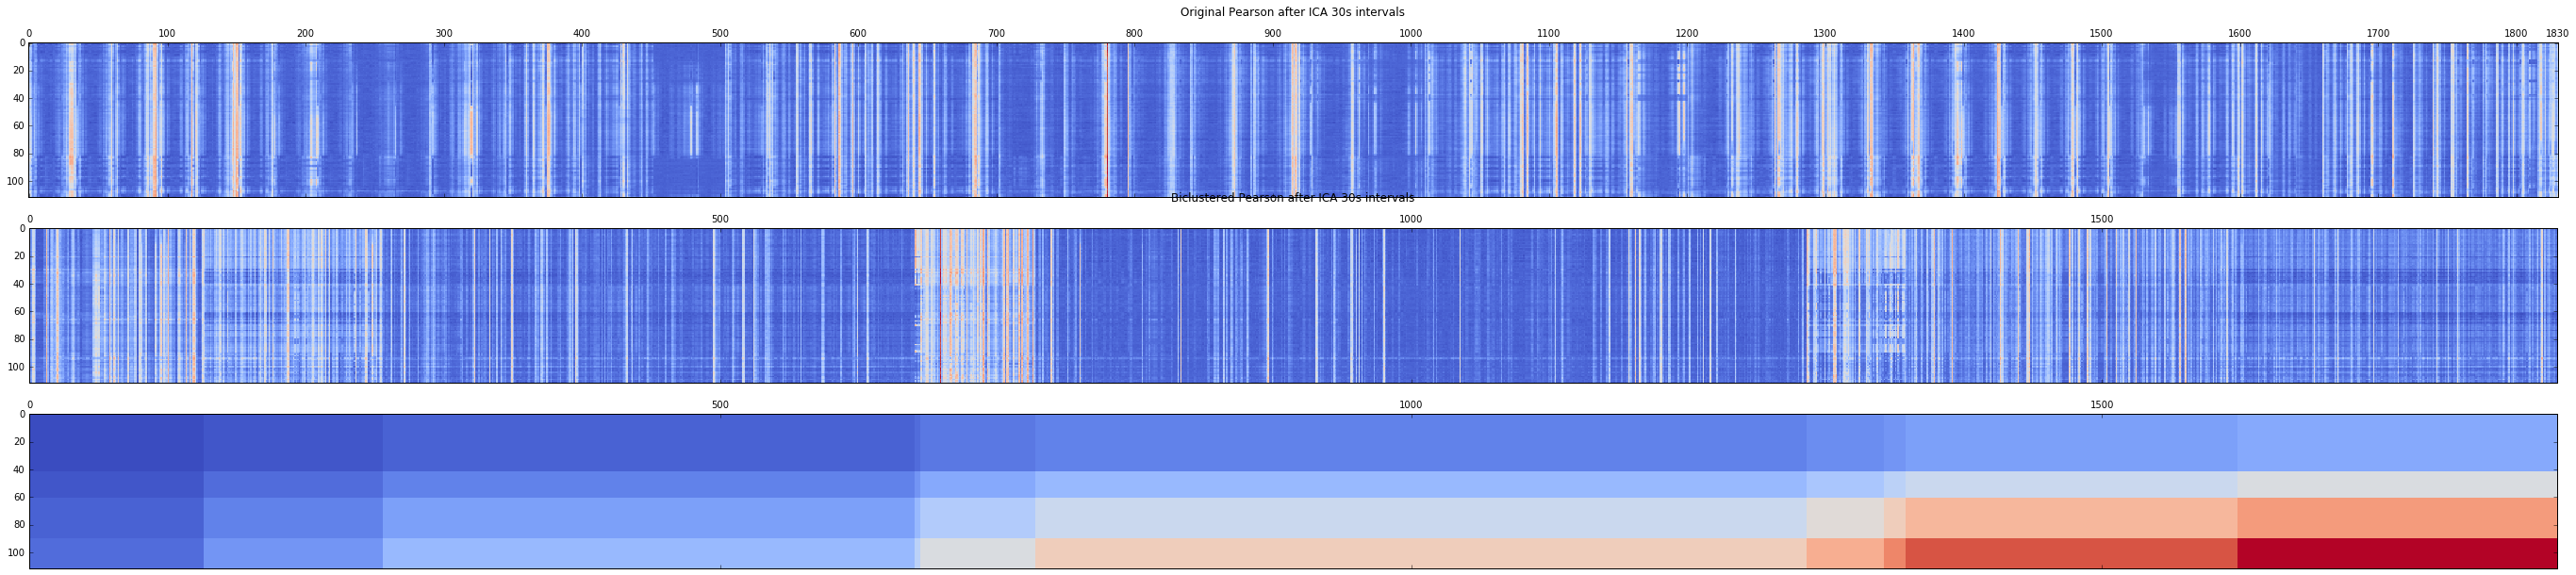

In [11]:
post_process_data = np.array(data)
spectral_model = SpectralBiclustering((4,10))
spectral_model.fit(post_process_data)
fit_data = post_process_data[np.argsort(spectral_model.row_labels_)]
fit_data = fit_data[:, np.argsort(spectral_model.column_labels_)]

fig = plt.figure(figsize=(160,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
cluster_ax1 = ax1.matshow(post_process_data, cmap=plt.cm.coolwarm)
ax1.set_xticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1830])
# fig.colorbar(cluster_ax1)
ax1.set_title('Original Pearson after ICA 30s intervals\n')
# plt.savefig('../media/json/pearson/ICA/pearson_ICA_30s.png')
cluster_ax2 = ax2.matshow(fit_data, cmap=plt.cm.coolwarm)
# fig.colorbar(cluster_ax2)
ax2.set_title('Biclustered Pearson after ICA 30s intervals\n')
# plt.savefig('../media/json/pearson/ICA/pearson_ICA_30s.png')
cluster_ax3 = ax3.matshow(np.outer(np.sort(spectral_model.row_labels_) + 1,
                     np.sort(spectral_model.column_labels_) + 1),
            cmap=plt.cm.coolwarm)
# fig.colorbar(cluster_ax3)

# PEARSON

In [7]:
with open('media/json/pearson/ICA/ICA-matrix-30s.json', 'w+') as f:
    p = [[float(column) for column in row] for row in post_process_data]
    f.write(json.dumps({'name': 's5d2nap', 'data': p}))

cols = np.argsort(spectral_model.column_labels_)
rows = np.argsort(spectral_model.row_labels_)
indices_matrix = []   
for row in rows:
    for col in cols:
        indices_matrix.append((float(row),float(col)))

with open('media/json/pearson/ICA/fitted-indices-ICA-pearson-30s.json', 'w+') as f:
    f.write(json.dumps({'name': 's5d2nap', 'data': indices_matrix}))

# with open('C:\Users\Fioger\Desktop\eeg-viz\postprocess/pearson/z_score/z_score_pearson_30s_dump.dump', 'wb') as f:
#     cPickle.dump(channels_data, f)

# SPEARMAN

In [5]:
with open('media/json/spearman/ICA/ICA-matrix-30s.json', 'w+') as f:
    p = [[float(column) for column in row] for row in post_process_data]
    f.write(json.dumps({'name': 's5d2nap', 'data': p}))

cols = np.argsort(spectral_model.column_labels_)
rows = np.argsort(spectral_model.row_labels_)
indices_matrix = []
for row in rows:
    for col in cols:
        indices_matrix.append((float(row),float(col)))

with open('media/json/spearman/ICA/fitted-indices-ICA-spearman-30s.json', 'w+') as f:
    f.write(json.dumps({'name': 's5d2nap', 'data': indices_matrix}))

# COSINE SIMILARITY

In [8]:
with open('media/json/cosine/ICA/ICA-cos-matrix-30s.json', 'w+') as f:
    p = [[float(column) for column in row] for row in post_process_data]
    f.write(json.dumps({'name': 's5d2nap', 'data': p}))

cols = np.argsort(spectral_model.column_labels_)
rows = np.argsort(spectral_model.row_labels_)
indices_matrix = []   
for row in rows:
    for col in cols:
        indices_matrix.append((float(row),float(col)))

with open('media/json/cosine/ICA/fitted-indices-ICA-cos-30s_float.json', 'w+') as f:
    f.write(json.dumps({'name': 's5d2nap', 'data': indices_matrix}))

# SSIM

In [12]:
with open('media/json/ssim/ICA/ICA-matrix-30s.json', 'w+') as f:
    p = [[float(column) for column in row] for row in post_process_data]
    f.write(json.dumps({'name': 's5d2nap', 'data': p}))

cols = np.argsort(spectral_model.column_labels_)
rows = np.argsort(spectral_model.row_labels_)
indices_matrix = []   
for row in rows:
    for col in cols:
        indices_matrix.append((float(row),float(col)))

with open('media/json/ssim/ICA/fitted-indices-ICA-pearson-30s.json', 'w+') as f:
    f.write(json.dumps({'name': 's5d2nap', 'data': indices_matrix}))